In [1]:
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# URL of the dataset
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=ICSA"
# Fetching the data from the URL
response = requests.get(url)
# Reading the data into a DataFrame
df = pd.read_csv(io.StringIO(response.text))
print(df.head(10)) # Displays the first 10 rows

         DATE    ICSA
0  1967-01-07  208000
1  1967-01-14  207000
2  1967-01-21  217000
3  1967-01-28  204000
4  1967-02-04  216000
5  1967-02-11  229000
6  1967-02-18  229000
7  1967-02-25  242000
8  1967-03-04  310000
9  1967-03-11  241000


In [2]:
df.shape

(2991, 2)

In [3]:
# Convert 'DATE' column to datetime
print('DATE data type before conversion:')
print(df['DATE'].dtypes)
df['DATE'] = pd.to_datetime(df['DATE'])
print('DATE data type after conversion:')
print(df['DATE'].dtypes)

DATE data type before conversion:
object
DATE data type after conversion:
datetime64[ns]


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
# Check for duplicates
duplicates = df.duplicated().sum()
# Handling missing values (if any, here we just print them)
print(f"Missing values:\n{missing_values}")
print(f"Duplicate values:\n{duplicates}")

Missing values:
DATE    0
ICSA    0
dtype: int64
Duplicate values:
0


In [5]:
print(f"Statistical Summary:")
print(df.describe())

Statistical Summary:
                      DATE          ICSA
count                 2991  2.991000e+03
mean   1995-09-02 00:00:00  3.648402e+05
min    1967-01-07 00:00:00  1.620000e+05
25%    1981-05-05 12:00:00  2.900000e+05
50%    1995-09-02 00:00:00  3.410000e+05
75%    2009-12-29 12:00:00  3.985000e+05
max    2024-04-27 00:00:00  6.137000e+06
std                    NaN  2.416165e+05


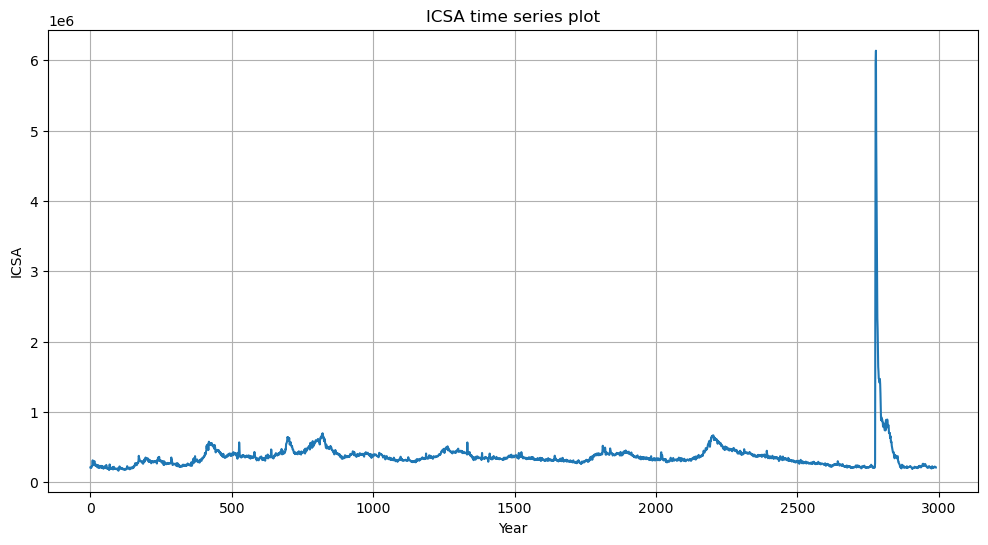

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ICSA'])
plt.title('ICSA time series plot')
plt.xlabel('Year')
plt.ylabel('ICSA')
plt.grid(True)
plt.show()

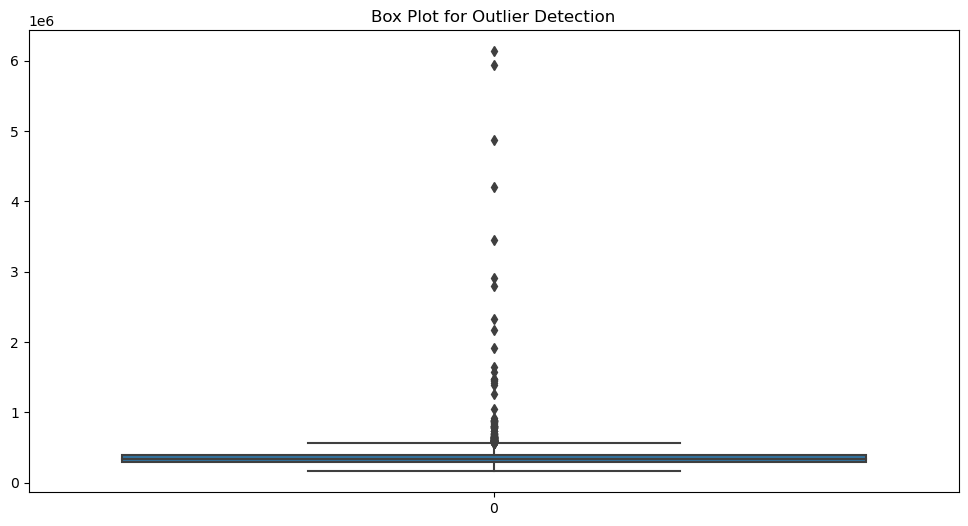

In [7]:
# Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(df['ICSA'])
plt.title('Box Plot for Outlier Detection')
plt.show()

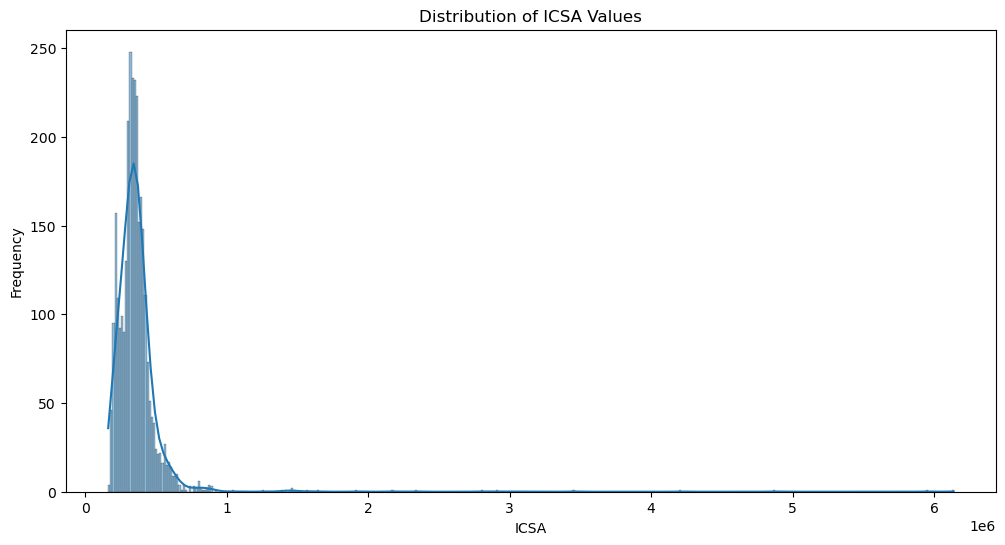

In [8]:
# Distribution of ICSA values
plt.figure(figsize=(12, 6))
sns.histplot(df['ICSA'], kde=True)
plt.title('Distribution of ICSA Values')
plt.xlabel('ICSA')
plt.ylabel('Frequency')
plt.show()

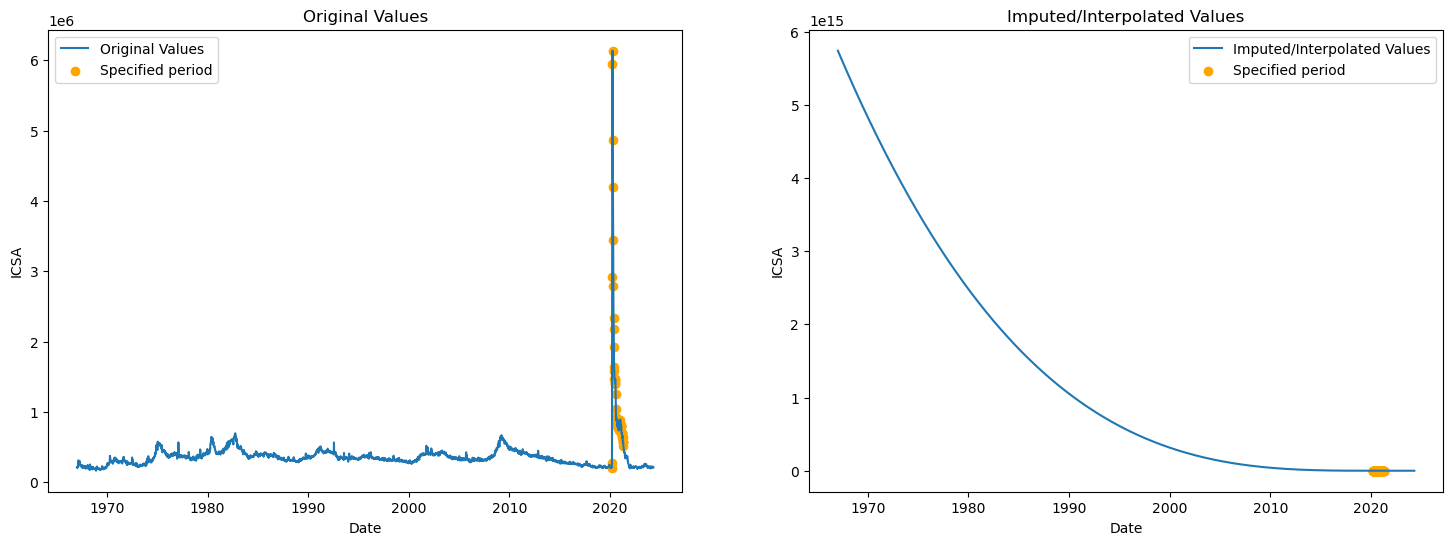

In [10]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
start_date = '2020-03-01'
end_date = '2021-05-01'
period_data = df[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
period_indices = df.index[(df['DATE'] >= start_date) & (df['DATE'] <= end_date)]
cubic_spline = CubicSpline(period_indices, period_data['ICSA'])
imputation_indices = np.arange(df.index.min(), df.index.max() + 1)
imputed_values = cubic_spline(imputation_indices)
# Update the original dataframe with imputed or interpolated values
df.loc[imputation_indices, 'ICSA_imputed'] = imputed_values
fig, axs = plt.subplots(1, 2, figsize=(18, 6)) # 1 row, 2 columns
axs[0].plot(df['DATE'], df['ICSA'], label='Original Values')
axs[0].scatter(period_data['DATE'], period_data['ICSA'], color='orange', label='Specified period')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('ICSA')
axs[0].set_title('Original Values')
axs[0].legend()
axs[1].plot(df['DATE'], df['ICSA_imputed'], label='Imputed/Interpolated Values')
axs[1].scatter(period_data['DATE'], period_data['ICSA'], color='orange', label='Specified period')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('ICSA')
axs[1].set_title('Imputed/Interpolated Values')
axs[1].legend()
plt.show()

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df.index = pd.to_datetime(df.index)
size = int(len(df) * 0.8)
Xtrain, Xtest = df.iloc[:size]['ICSA'], df.iloc[size:]['ICSA']
model_multi = ExponentialSmoothing(Xtrain, trend='mul', seasonal='mul', seasonal_periods=12).fit()
forecast_multi = model_multi.forecast(steps=len(Xtest))
model_add = ExponentialSmoothing(Xtrain, trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_add = model_add.forecast(steps=len(Xtest))
print(forecast_multi)
print(forecast_add)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


1970-01-01 00:00:00.000002392    365395.057430
1970-01-01 00:00:00.000002393    362276.449269
1970-01-01 00:00:00.000002394    361893.738692
1970-01-01 00:00:00.000002395    359468.964504
1970-01-01 00:00:00.000002396    357505.057104
                                     ...      
1970-01-01 00:00:00.000002986    135824.364861
1970-01-01 00:00:00.000002987    135344.294413
1970-01-01 00:00:00.000002988    137082.894017
1970-01-01 00:00:00.000002989    137793.562839
1970-01-01 00:00:00.000002990    137557.705235
Freq: N, Length: 599, dtype: float64
1970-01-01 00:00:00.000002392    362690.022276
1970-01-01 00:00:00.000002393    360678.020668
1970-01-01 00:00:00.000002394    359967.198357
1970-01-01 00:00:00.000002395    358287.387630
1970-01-01 00:00:00.000002396    358271.423499
                                     ...      
1970-01-01 00:00:00.000002986    -45224.312373
1970-01-01 00:00:00.000002987    -46340.484876
1970-01-01 00:00:00.000002988    -41934.285489
1970-01-01 00:00:00.000

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [15]:
print(forecast_add.iloc[-1])

-42270.931346616846


In [16]:
print(forecast_multi.iloc[-1])

137557.70523480608
